# Loader demos
Demos the loader functions and some related utility

In [1]:
import osmnx as ox
import networkx as nx
import numpy as np
import pandas as pd
import folium
import matplotlib.pyplot as plt
import copy
import igraph as ig

In [2]:
import os
os.chdir('../')

In [3]:
from roc_bike_growth.loader import POI_graph_from_polygon, bike_infra_from_polygon, carall_from_polygon
rochester = ox.geocode_to_gdf('rochester, ny').geometry[0]
POIs = POI_graph_from_polygon(rochester)

No OSM data for bike_designatedpath
No OSM data for bike_cyclewayrighttrack
No OSM data for bike_cyclewaylefttrack
No OSM data for bike_cyclestreet
No OSM data for bike_bicycleroad
No OSM data for bike_livingstreet


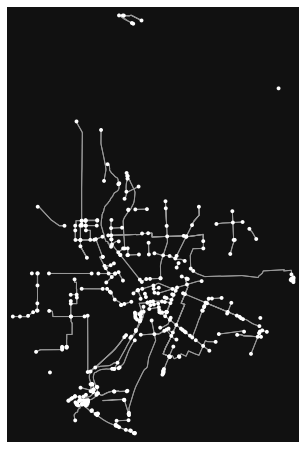

In [4]:
bike_infra = bike_infra_from_polygon(rochester)
fig, ax = ox.plot.plot_graph(bike_infra)

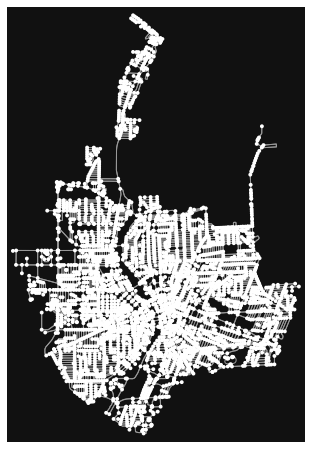

In [5]:
carall = carall_from_polygon(rochester, add_pois=True)
fig, ax = ox.plot.plot_graph(carall)

In [6]:
# Get list of POIs
pois = nx.get_node_attributes(carall, 'poi').keys()

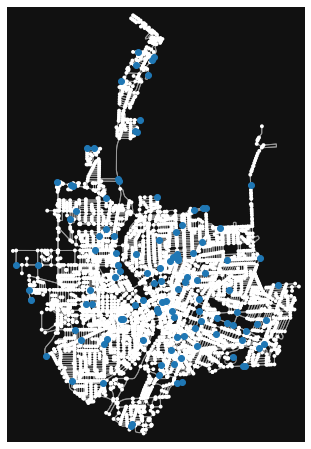

In [7]:
# Plot POIs on graph
x, y = [], []
for node in pois:
    d = carall.nodes()[node]
    x.append(d['x'])
    y.append(d['y'])
ax.scatter(x,y)
fig

In [8]:
#combining the carall graph with the bike infrastructure node wise
#add nodes: 
car_copy = copy.deepcopy(carall)
c = list(dict(car_copy.nodes(data=True)).keys())
b = list(dict(bike_infra.nodes(data=True)).keys())

for node in b:
    if(node in c):
        pass
    else:
        car_copy.add_node(node)
        car_copy.nodes[node]['x'] = bike_infra.nodes[node]['x']
        car_copy.nodes[node]['y'] = bike_infra.nodes[node]['y']
        car_copy.nodes[node]['street_count'] = bike_infra.nodes[node]['street_count']


In [9]:
#combining carall graph with bike infrastructure edge wise
be = list(bike_infra.edges)
ce = list(car_copy.edges)

for edge in be:
    if(edge in ce):
        pass
        #print(edge)
        #sim+=1 
    else:
        a = dict(bike_infra[edge[0]][edge[1]][edge[2]])
        car_copy.add_edge(edge[0],edge[1])
        edge_a = {edge: a}
        #print(edge_a)
        nx.set_edge_attributes(car_copy,edge_a)
        #print(edge)
        #dif+=1
#print(sim)
#dif

In [10]:
carall_ig = ig.Graph.from_networkx(car_copy)
pois_ids = [v_index for v_index,vertex in enumerate(carall_ig.vs) if vertex['poi']]
pois_ids

[12,
 20,
 29,
 239,
 283,
 316,
 361,
 362,
 365,
 456,
 461,
 462,
 464,
 494,
 521,
 522,
 539,
 565,
 585,
 610,
 629,
 684,
 692,
 869,
 899,
 901,
 907,
 917,
 1034,
 1040,
 1067,
 1096,
 1139,
 1141,
 1142,
 1143,
 1195,
 1310,
 1332,
 1443,
 1464,
 1511,
 1587,
 1592,
 1593,
 1651,
 1652,
 1653,
 1702,
 1704,
 1717,
 1805,
 1964,
 1979,
 1981,
 1996,
 2092,
 2098,
 2099,
 2101,
 2144,
 2218,
 2228,
 2233,
 2261,
 2300,
 2315,
 2350,
 2383,
 2442,
 2476,
 2502,
 2533,
 2634,
 2642,
 2719,
 2760,
 2803,
 2820,
 2875,
 2881,
 2972,
 3027,
 3148,
 3239,
 3246,
 3252,
 3393,
 3405,
 3441,
 3479,
 3503,
 3511,
 3524,
 3704,
 3717,
 3829,
 3885,
 3924,
 3972,
 4005,
 4014,
 4076,
 4158,
 4186,
 4308,
 4330,
 4403,
 4564,
 4593,
 4643,
 4653,
 4672]

In [11]:
for edge in carall_ig.es:
    edge['weight'] = edge['length']
for i,v in enumerate(carall_ig.vs):
    v['id'] = i

In [12]:
import roc_bike_growth.paper_gt
from roc_bike_growth.paper_gt import gt_from_scratch

In [13]:
roc_graph = gt_from_scratch(carall_ig, pois_ids, prune_factor = 0.1)

/home/jovyan/work/Projects/bike_project/roc-bike-growth-main/roc_bike_growth/paper_gt.py:22: RuntimeWarning: Couldn't reach some vertices at src/paths/unweighted.c:367
  poi_nodes.append(G.get_shortest_paths(v, pois_indices[c:], output = "vpath"))
/home/jovyan/work/Projects/bike_project/roc-bike-growth-main/roc_bike_growth/paper_gt.py:23: RuntimeWarning: Couldn't reach some vertices at src/paths/unweighted.c:367
  poi_edges.append(G.get_shortest_paths(v, pois_indices[c:], output = "epath"))


In [14]:
rg_nx = ig.Graph.to_networkx(roc_graph)


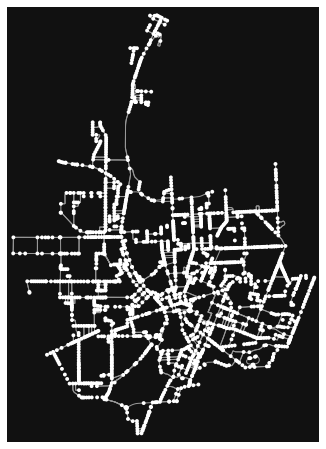

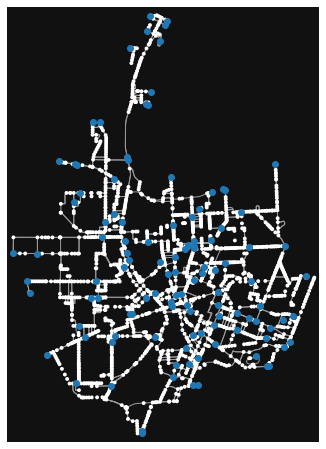

In [15]:
fig, ax = ox.plot.plot_graph(rg_nx)
# Plot POIs on graph
x, y = [], []
for node in pois:
    d = carall.nodes()[node]
    x.append(d['x'])
    y.append(d['y'])
ax.scatter(x,y)
fig

<AxesSubplot:>

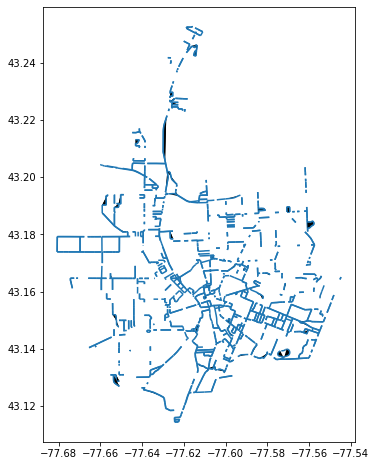

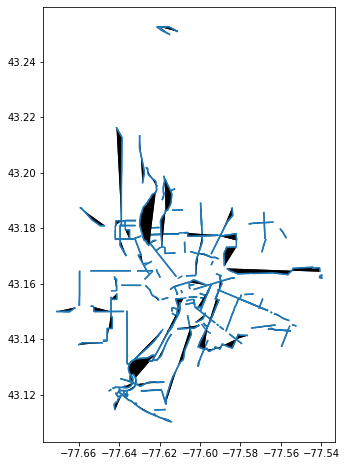

In [24]:
nodes, edges = ox.graph_to_gdfs(rg_nx)

# Plot the nodes
fig, ax = plt.subplots(figsize=(12,8))
edges.plot(ax=ax, facecolor='black')

nodes, edges = ox.graph_to_gdfs(bike_infra)
fig, ax = plt.subplots(figsize=(12,8))
edges.plot(ax=ax, facecolor='black')


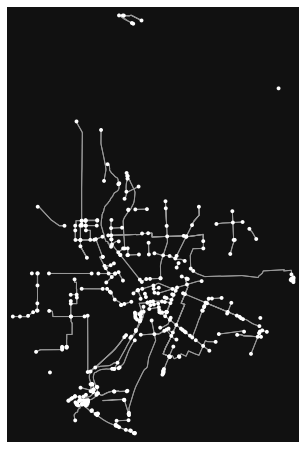

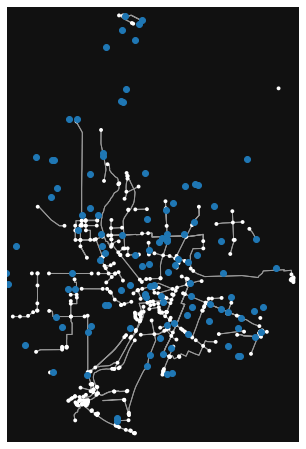

In [25]:

fig,ax = ox.plot.plot_graph(bike_infra)

x, y = [], []
for node in pois:
    d = carall.nodes()[node]
    x.append(d['x'])
    y.append(d['y'])
ax.scatter(x,y)
fig

In [26]:
from roc_bike_growth.paper_gt import route_node_pairs